In [1]:
# Import the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('../train-small.csv')
train_df.head()

,Unnamed: 0,Image,PatientId,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,0,00012880_006.png,12880,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,00010648_005.png,10648,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,2,00016378_002.png,16378,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,00020987_000.png,20987,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4,00012569_000.png,12569,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [8]:
train_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
train_df.head()

,Image,PatientId,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00012880_006.png,12880,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,00010648_005.png,10648,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,00016378_002.png,16378,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,00020987_000.png,20987,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,00012569_000.png,12569,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [10]:
# Count up the number of instances of each class (drop non-class columns from the counts)
class_counts = train_df.sum().drop(['Image','PatientId'])
class_counts

Atelectasis           100
Cardiomegaly           19
Consolidation          23
Edema                  13
Effusion               88
Emphysema              21
Fibrosis               13
Hernia                  1
Infiltration          160
Mass                   34
Nodule                 58
Pleural_Thickening     22
Pneumonia               9
Pneumothorax           22
dtype: object

In [11]:
for column in class_counts.keys():
    print(f"The class {column} has {train_df[column].sum()} samples")

The class Atelectasis has 100 samples
The class Cardiomegaly has 19 samples
The class Consolidation has 23 samples
The class Edema has 13 samples
The class Effusion has 88 samples
The class Emphysema has 21 samples
The class Fibrosis has 13 samples
The class Hernia has 1 samples
The class Infiltration has 160 samples
The class Mass has 34 samples
The class Nodule has 58 samples
The class Pleural_Thickening has 22 samples
The class Pneumonia has 9 samples
The class Pneumothorax has 22 samples


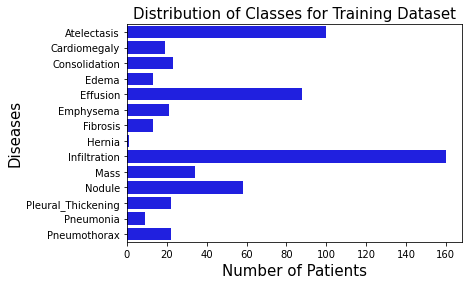

In [12]:
# Plot up the distribution of counts
sns.barplot(class_counts.values, class_counts.index, color='b')
plt.title('Distribution of Classes for Training Dataset', fontsize=15)
plt.xlabel('Number of Patients', fontsize=15)
plt.ylabel('Diseases', fontsize=15)
plt.show()

<a name="weighted-loss"></a>
# Weighted Loss function

In [13]:
# Generate an array of 4 binary label values, 3 positive and 1 negative
y_true = np.array(
        [[1],
         [1],
         [1],
         [0]])
print(f"y_true: \n{y_true}")

y_true: 
[[1]
 [1]
 [1]
 [0]]


In [14]:
# Make model predictions that are always 0.9 for all examples
y_pred_1 = 0.9 * np.ones(y_true.shape)
print(f"y_pred_1: \n{y_pred_1}")
print()
y_pred_2 = 0.1 * np.ones(y_true.shape)
print(f"y_pred_2: \n{y_pred_2}")


y_pred_1: 
[[0.9]
 [0.9]
 [0.9]
 [0.9]]

y_pred_2: 
[[0.1]
 [0.1]
 [0.1]
 [0.1]]


In [15]:
loss_reg_1 = -1 * np.sum(y_true * np.log(y_pred_1)) + \
                -1 * np.sum((1 - y_true) * np.log(1 - y_pred_1))
print(f"loss_reg_1: {loss_reg_1:.4f}")

loss_reg_1: 2.6187


In [16]:
loss_reg_2 = -1 * np.sum(y_true * np.log(y_pred_2)) + \
                -1 * np.sum((1 - y_true) * np.log(1 - y_pred_2))
print(f"loss_reg_2: {loss_reg_2:.4f}")

loss_reg_2: 7.0131


In [17]:
print(f"When the model 1 always predicts 0.9, the regular loss is {loss_reg_1:.4f}")
print(f"When the model 2 always predicts 0.1, the regular loss is {loss_reg_2:.4f}")

When the model 1 always predicts 0.9, the regular loss is 2.6187
When the model 2 always predicts 0.1, the regular loss is 7.0131


In [18]:
# calculate the positive weight as the fraction of negative labels
w_p = 1/4

# calculate the negative weight as the fraction of positive labels
w_n = 3/4

print(f"positive weight w_p: {w_p}")
print(f"negative weight w_n {w_n}")

positive weight w_p: 0.25
negative weight w_n 0.75


### Model 1 weighted loss
Run the next two cells to calculate the two loss terms separately.

Here, `loss_1_pos` and `loss_1_neg` are calculated using the `y_pred_1` predictions.

In [19]:
# Calculate and print out the first term in the loss function, which we are calling 'loss_pos'
loss_1_pos = -1 * np.sum(w_p * y_true * np.log(y_pred_1 ))
print(f"loss_1_pos: {loss_1_pos:.4f}")

loss_1_pos: 0.0790


In [20]:
# Calculate and print out the second term in the loss function, which we're calling 'loss_neg'
loss_1_neg = -1 * np.sum(w_n * (1 - y_true) * np.log(1 - y_pred_1 ))
print(f"loss_1_neg: {loss_1_neg:.4f}")

loss_1_neg: 1.7269


In [21]:
# Sum positive and negative losses to calculate total loss
loss_1 = loss_1_pos + loss_1_neg
print(f"loss_1: {loss_1:.4f}")

loss_1: 1.8060


### Model 2 weighted loss

Now do the same calculations for when the predictions are from `y_pred_2'.  Calculate the two terms of the weighted loss function and add them together.

In [22]:
# Calculate and print out the first term in the loss function, which we are calling 'loss_pos'
loss_2_pos = -1 * np.sum(w_p * y_true * np.log(y_pred_2))
print(f"loss_2_pos: {loss_2_pos:.4f}")

loss_2_pos: 1.7269


In [23]:
# Calculate and print out the second term in the loss function, which we're calling 'loss_neg'
loss_2_neg = -1 * np.sum(w_n * (1 - y_true) * np.log(1 - y_pred_2))
print(f"loss_2_neg: {loss_2_neg:.4f}")

loss_2_neg: 0.0790


In [24]:
# Sum positive and negative losses to calculate total loss when the prediction is y_pred_2
loss_2 = loss_2_pos + loss_2_neg
print(f"loss_2: {loss_2:.4f}")

loss_2: 1.8060


### Compare model 1 and model 2 weighted loss

In [25]:
print(f"When the model always predicts 0.9, the total loss is {loss_1:.4f}")
print(f"When the model always predicts 0.1, the total loss is {loss_2:.4f}")

When the model always predicts 0.9, the total loss is 1.8060
When the model always predicts 0.1, the total loss is 1.8060


In [26]:
print(f"loss_1_pos: {loss_1_pos:.4f} \t loss_1_neg: {loss_1_neg:.4f}")
print()
print(f"loss_2_pos: {loss_2_pos:.4f} \t loss_2_neg: {loss_2_neg:.4f}")

loss_1_pos: 0.0790 	 loss_1_neg: 1.7269

loss_2_pos: 1.7269 	 loss_2_neg: 0.0790


### Weighted Loss for more than one class

In this week's assignment, you will calculate the multi-class weighted loss (when there is more than one disease class that your model is learning to predict).  Here, you can practice working with 2D numpy arrays, which will help you implement the multi-class weighted loss in the graded assignment.

You will work with a dataset that has two disease classes (two columns)

In [27]:
# View the labels (true values) that you will practice with
y_true = np.array(
        [[1,0],
         [1,0],
         [1,0],
         [1,0],
         [0,1]
        ])
y_true

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1]])

In [28]:
# See what happens when you set axis=0
print(f"using axis = 0 {np.sum(y_true,axis=0)}")

# Compare this to what happens when you set axis=1
print(f"using axis = 1 {np.sum(y_true,axis=1)}")

using axis = 0 [4 1]
using axis = 1 [1 1 1 1 1]


### Calculate the weights
Previously, you visually inspected the data to calculate the fraction of negative and positive labels.  Here, you can do this programmatically.

In [29]:
# set the positive weights as the fraction of negative labels (0) for each class (each column)
w_p = np.sum(y_true == 0,axis=0) / y_true.shape[0]
w_p

array([0.2, 0.8])

In [30]:
y_true.shape[0]

5

In [31]:
y_true == 0

array([[False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False]])

In [37]:
# set the negative weights as the fraction of positive labels (1) for each class
w_n = np.sum(y_true == 1, axis=0) / y_true.shape[0]
w_n

array([0.8, 0.2])

In the assignment, you will train a model to try and make useful predictions.  In order to make this example easier to follow, you will pretend that your model always predicts the same value for every example.

In [32]:
# Set model predictions where all predictions are the same
y_pred = np.ones(y_true.shape)
y_pred[:,0] = 0.3 * y_pred[:,0]
y_pred[:,1] = 0.7 * y_pred[:,1]
y_pred

array([[0.3, 0.7],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.3, 0.7]])

As before, calculate the two terms that make up the loss function.  Notice that you are working with more than one class (represented by columns).  In this case, there are two classes.

Start by calculating the loss for class `0`.

$$ loss^{(i)} = loss_{pos}^{(i)} + los_{neg}^{(i)} $$

$$loss_{pos}^{(i)} = -1 \times weight_{pos}^{(i)} \times y^{(i)} \times log(\hat{y}^{(i)})$$

$$loss_{neg}^{(i)} = -1 \times weight_{neg}^{(i)} \times (1- y^{(i)}) \times log(1 - \hat{y}^{(i)})$$

View the zero column for the weights, true values, and predictions that you will use to calculate the loss from the positive predictions.

In [33]:
# Print and view column zero of the weight
print(f"w_p[0]: {w_p[0]}")
print(f"y_true[:,0]: {y_true[:,0]}")
print(f"y_pred[:,0]: {y_pred[:,0]}")

w_p[0]: 0.2
y_true[:,0]: [1 1 1 1 0]
y_pred[:,0]: [0.3 0.3 0.3 0.3 0.3]


In [34]:
# calculate the loss from the positive predictions, for class 0
loss_0_pos = -1 * np.sum(w_p[0] * 
                y_true[:, 0] * 
                np.log(y_pred[:, 0])
              )
print(f"loss_0_pos: {loss_0_pos:.4f}")

loss_0_pos: 0.9632


View the zero column for the weights, true values, and predictions that you will use to calculate the loss from the negative predictions.

In [38]:
# Print and view column zero of the weight
print(f"w_n[0]: {w_n[0]}")
print(f"y_true[:,0]: {y_true[:,0]}")
print(f"y_pred[:,0]: {y_pred[:,0]}")

w_n[0]: 0.8
y_true[:,0]: [1 1 1 1 0]
y_pred[:,0]: [0.3 0.3 0.3 0.3 0.3]


In [39]:
# Calculate the loss from the negative predictions, for class 0
loss_0_neg = -1 * np.sum( 
                w_n[0] * 
                (1 - y_true[:, 0]) * 
                np.log(1 - y_pred[:, 0])
              )
print(f"loss_0_neg: {loss_0_neg:.4f}")

loss_0_neg: 0.2853


In [40]:
# Calculate the loss from the negative predictions, for class 1
loss_1_neg = - 1 * np.sum(w_n[1] * (1 - y_true[:, 1]) * np.log(1 - y_pred[:, 1]))
print(f"loss_1_neg: {loss_1_neg:.4f}")

loss_1_neg: 0.9632


In [45]:
# add the two loss terms to get the total loss for class 0
loss_0 = loss_0_neg + loss_0_pos
print(f"loss_0: {loss_0:.4f}")

loss_0: 1.2485


In [42]:
loss_1_pos = -1 * np.sum(w_p[1] * 
                y_true[:, 1] * 
                np.log(y_pred[:, 1])
              )
print(f"loss_1_pos: {loss_1_pos:.4f}")

loss_1_pos: 0.2853


In [43]:
loss_1_neg = -1 * np.sum( 
                w_n[1] * 
                (1 - y_true[:, 1]) * 
                np.log(1 - y_pred[:, 1])
              )
print(f"loss_1_neg: {loss_1_neg:.4f}")

loss_1_neg: 0.9632


In [44]:
loss_1 = loss_1_neg + loss_1_pos
print(f"loss_1: {loss_1:.4f}")

loss_1: 1.2485
